# ML Modelling

#### Problem Statement:
$$ \star  \star \star \star \star $$
We have a star dataset, which have characterstics of stars(temprature,radius) based on their types. We want to build a ML which can predict the type of stars based on these characterstics.
So primarily it is a classification problem.\
Here we are going to use various classfication methods and then we will compare their performance on this dataset.
$$ \star  \star \star \star \star $$

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
#import dataset
df = pd.read_csv("6 class csv.csv")

## Explore

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
df.columns = df.columns.str.replace(" ","_")

In [5]:
df.sample(6)

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
210,22350,12450.00000,6.36000,-3.67,3,Blue-white,B
171,3500,138000.00000,1420.00000,-8.18,5,Red,M
3,2800,0.00020,0.16000,16.65,0,Red,M
124,3511,0.00064,0.10900,17.12,0,Red,M
88,13720,0.00018,0.00892,12.97,2,white,F
177,11000,170000.00000,1779.00000,-9.90,5,Blue-white,B


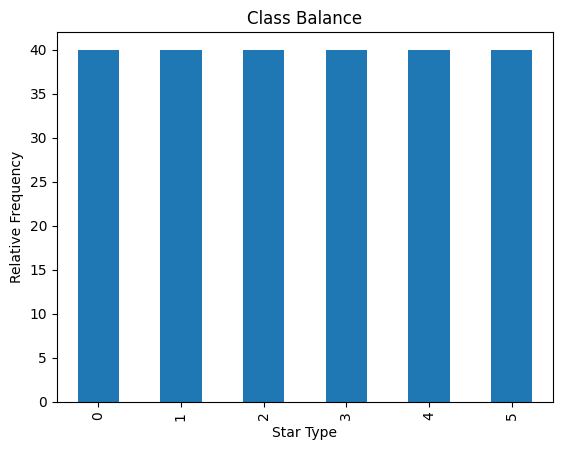

In [6]:
df.Star_type.value_counts().plot(kind='bar',xlabel='Star Type',ylabel='Relative Frequency',title='Class Balance');

- Our target variable is Star Type
- It is perfectly balanced
- In feature matrix some range of values are very unevenly distributed, we can use standardisation here

## Split    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_(K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute_magnitude(Mv)  240 non-null    float64
 4   Star_type               240 non-null    int64  
 5   Star_color              240 non-null    object 
 6   Spectral_Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [8]:
 list(df.select_dtypes(float).columns)

['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)']

In [9]:
target = 'Star_type'
num_var =['Temperature_(K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)']
cat_var = ['Star_color','Spectral_Class']
X = df[num_var+cat_var]
y = df[target]

In [10]:
print(f'shape of Feature matrix is:{X.shape}')
print(f'shape of target vector is:{y.shape}')

shape of Feature matrix is:(240, 6)
shape of target vector is:(240,)


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Model

### Preprocessing

Here we will use standardisation on numerical columns and One hot encoding on categorical variables. To do it together, we take help of column transformer.

In [12]:
num_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

In [13]:
cat_pipeline = Pipeline(steps=[
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [14]:

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_var),
    ('cat_pipeline',cat_pipeline,cat_var)
    ],
    remainder='drop',
    n_jobs=-1)

### Logisitic Regression

In [15]:
lr = LogisticRegression(random_state=0)
model_lr = Pipeline(steps=[
    ('col_trans', col_trans),
  ('model', lr)
])

In [17]:
model_lr.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Temperature_(K)',
                                                   'Luminosity(L/Lo)',
                                                   'Radius(R/Ro)',
                                                   'Absolute_magnitude(Mv)']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Star_color',
                                                   'Spectral_Class'])])),
                ('model', LogisticRegression(random_state=0))])

In [18]:
ytrain_pred = model_lr.predict(X_train)
ytest_pred = model_lr.predict(X_test)

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()
model_dt = Pipeline(steps=[
    ('col_trans', col_trans),
  ('model', dt)
])

In [22]:
model_dt.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Temperature_(K)',
                                                   'Luminosity(L/Lo)',
                                                   'Radius(R/Ro)',
                                                   'Absolute_magnitude(Mv)']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Star_color',
                                                   'Spectral_Class'])])),
                ('model', DecisionTreeClassifier())])

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(random_state=42)
model_rf = Pipeline(steps=[
    ('col_trans', col_trans),
  ('model', rf)
])

In [26]:
model_rf.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Temperature_(K)',
                                                   'Luminosity(L/Lo)',
                                                   'Radius(R/Ro)',
                                                   'Absolute_magnitude(Mv)']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Star_color',
                                                   'Spectral_Class'])])),
                ('model', RandomForestClassifier(random_state=42))])

## Cross validation, Model evaluation

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
print(cross_val_score(model_lr, X_train, y_train, cv=5))

[1.         0.97435897 1.         0.97368421 1.        ]


In [32]:
print(f'mean cross validation score for logistic regression model: {np.mean(cross_val_score(model_lr, X_train, y_train, cv=5))}')

mean cross validation score for logistic regression model: 0.989608636977058


In [43]:
print(f'accuracy score of logistic regression model with training dataset is :{accuracy_score(y_train,ytrain_pred)*100}')
print(f'accuracy score of logistic regression model with test dataset is :{accuracy_score(y_test,ytest_pred)*100}')

accuracy score of logistic regression model with training dataset is :98.95833333333334
accuracy score of logistic regression model with test dataset is :93.75


In [33]:
print(f'mean cross validation score for decision tree model: {np.mean(cross_val_score(model_dt, X_train, y_train, cv=5))}')

mean cross validation score for decision tree model: 0.9894736842105264


In [44]:
print(f'accuracy score of decision tree with training dataset is :{accuracy_score(y_train,model_dt.predict(X_train))*100}')
print(f'accuracy score of decision tree with test dataset is :{accuracy_score(y_test,model_dt.predict(X_test))*100}')

accuracy score of decision tree with training dataset is :100.0
accuracy score of decision tree with test dataset is :100.0


In [34]:
print(f'mean cross validation score for random forest model: {np.mean(cross_val_score(model_rf, X_train, y_train, cv=5))}')

mean cross validation score for random forest model: 1.0


In [45]:
print(f'accuracy score of random forest with training dataset is :{accuracy_score(y_train,model_rf.predict(X_train))*100}')
print(f'accuracy score of random forest with test dataset is :{accuracy_score(y_test,model_rf.predict(X_test))*100}')

accuracy score of random forest with training dataset is :100.0
accuracy score of random forest with test dataset is :100.0


### Feature Importances

In [48]:
importances = model_rf.named_steps['model'].feature_importances_

In [51]:
importances.shape

(25,)

In [55]:
onehot_columns = model_rf.named_steps['col_trans'].named_transformers_['cat_pipeline'].named_steps['one-hot'].get_feature_names_out(input_features=cat_var)


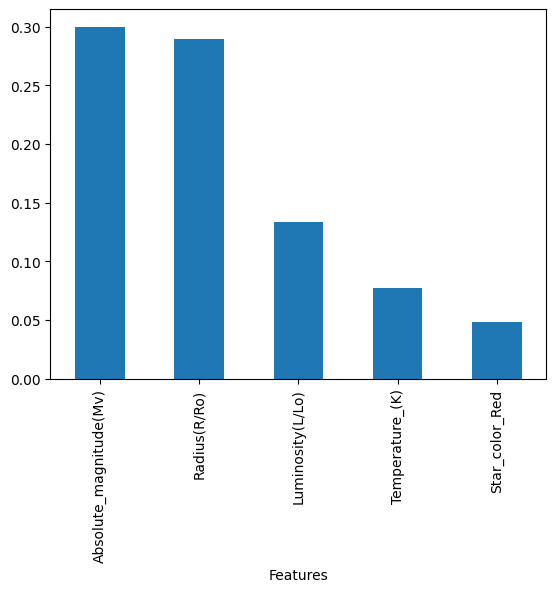

In [70]:
pd.Series(data= importances, index = np.array(num_var + list(onehot_columns))).sort_values(ascending=False).head(5).plot(kind='bar',xlabel='Features');

**Using these features stars can be classfied completely which is in aaccordance with HR Diagrams**